In [1]:
import pandas as pd

In [2]:
#training_path, testing_path and validation_path are for the text extracted from the meme images respectively in a .csv file
Training_path = 'data/train.jsonl'
Testing_path = 'data/test.jsonl'
Validation_path = 'data/dev.jsonl'
img_dir = 'data/img/'

In [3]:
train_samples_frame = pd.read_json(Training_path, lines=True)
train_samples_frame.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [6]:
train_samples_frame.label.value_counts()

0    5450
1    3050
Name: label, dtype: int64

In [7]:
train_samples_frame_0 = train_samples_frame[train_samples_frame['label']==0].sample(n=3000)
train_samples_frame_1 = train_samples_frame[train_samples_frame['label']==1].sample(n=3000)

train_samples_frame = pd.concat([train_samples_frame_0,train_samples_frame_1],axis=0)
train_samples_frame.head()

,id,img,label,text
866,53924,img/53924.png,0,mom : can you mash the vegies me :
3557,87619,img/87619.png,0,tap and say amen! if jesus has blessed you today
4143,84125,img/84125.png,0,when you beat the red light
4982,63029,img/63029.png,0,someone collect this white trash
1902,26903,img/26903.png,0,"i don't have ex's. i have y's. like, ""y the he..."


In [8]:
train_samples_frame.label.value_counts()

0    3000
1    3000
Name: label, dtype: int64

In [15]:
train_samples_frame.to_csv('train_final.csv',index=False)

In [10]:
# 1:hateful , 0:non-hateful

In [18]:
val_samples_frame = pd.read_json(Validation_path, lines=True)

val_samples_frame.to_csv('test_final.csv',index=False)

In [21]:
import os
import pandas as pd
import shutil


output_folder_label_0 = 'train/non_hate_full'
output_folder_label_1 = 'train/hate_full'

# Create the output folders if they don't exist
os.makedirs(output_folder_label_0, exist_ok=True)
os.makedirs(output_folder_label_1, exist_ok=True)

# Iterate through the DataFrame rows and copy images to the respective folders
for index, row in train_samples_frame.iterrows():
    img_path = row['img']
    label = row['label']
    img_filename = os.path.basename(os.path.join('data',img_path))
    
    if label == 0:
        output_path = os.path.join(output_folder_label_0, img_filename)
    elif label == 1:
        output_path = os.path.join(output_folder_label_1, img_filename)
    else:
        # Skip if label is not 0 or 1
        continue
    
    shutil.copy2(os.path.join('data',img_path), output_path)

#     break


In [23]:
import os

# Specify the directory where you have saved the emotion images
root_directory = './final_data/'

# Loop through all subdirectories
for emotion_folder in os.listdir(root_directory):
    emotion_folder_path = os.path.join(root_directory, emotion_folder)
    if os.path.isdir(emotion_folder_path):
        ds_store_path = os.path.join(emotion_folder_path, '.DS_Store')
        if os.path.exists(ds_store_path):
            os.remove(ds_store_path)
            print(f"Removed .DS_Store from {emotion_folder_path}")


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [2]:
import ktrain
from ktrain import vision as vis

In [3]:
DATADIR = 'final_data/'
(train_data, val_data, preproc) = vis.images_from_folder(datadir=DATADIR,
                                              # use a default data augmentation with horizontal_flip=True
                                              data_aug=vis.get_data_aug(horizontal_flip=True), 
                                              train_test_names=['train', 'valid'],
                                               target_size=(224,224), color_mode='rgb')

Found 6000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


sample hateful memes images:


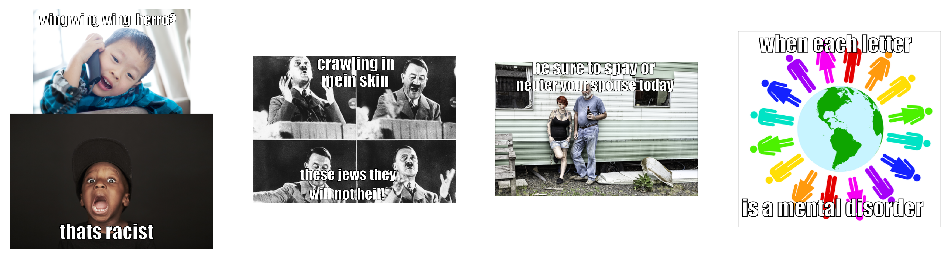

In [4]:
print('sample hateful memes images:')
vis.show_random_images(DATADIR+'/train/hate_full/') 

sample non_hateful images:


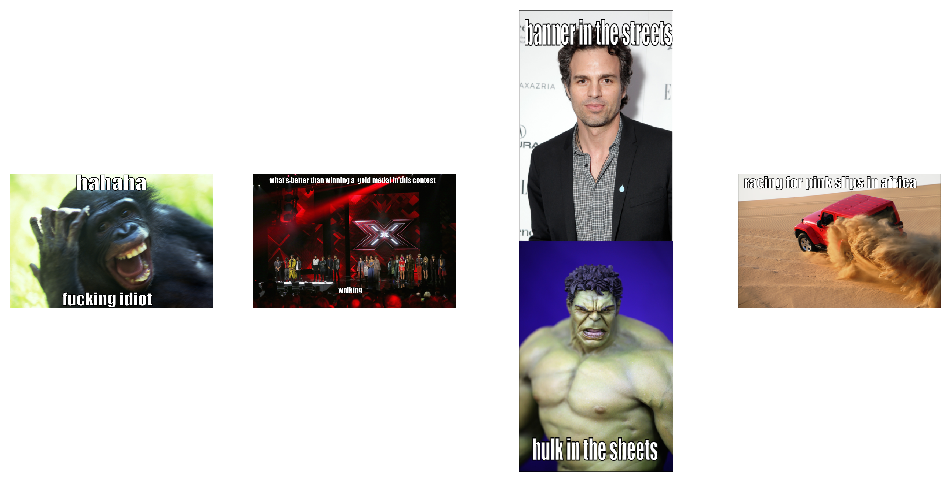

In [5]:
print('sample non_hateful images:')
vis.show_random_images(DATADIR+'/train/non_hate_full/')

In [6]:
# let's print the available precanned image classification models in ktrain
vis.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [7]:
model = vis.image_classifier('pretrained_resnet50', train_data, val_data)
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=False, batch_size=64)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
pretrained_resnet50 model created.


In [8]:
learner.freeze(freeze_range=15)

In [9]:
learner.print_layers()

0 (trainable=False) : <keras.engine.input_layer.InputLayer object at 0x17642b4c0>
1 (trainable=False) : <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x17642baf0>
2 (trainable=False) : <keras.layers.convolutional.conv2d.Conv2D object at 0x1763cd600>
3 (trainable=False) : <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x1764a1540>
4 (trainable=False) : <keras.layers.core.activation.Activation object at 0x1763cd510>
5 (trainable=False) : <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x1764a2d70>
6 (trainable=False) : <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x29c0b63e0>
7 (trainable=False) : <keras.layers.convolutional.conv2d.Conv2D object at 0x29c101ea0>
8 (trainable=False) : <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x29c121c30>
9 (trainable=False) : <keras.layers.core.activation.Activation object at 0x1764a2ef0>
10 (trainable=False) : <keras.layers.convolutional.conv2d.

In [24]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
93/93 [==============================] - 1141s 12s/step - loss: 0.9529 - accuracy: 0.5598
Epoch 2/1024
93/93 [==============================] - 1056s 11s/step - loss: 0.9191 - accuracy: 0.5588
Epoch 3/1024
79/93 [========================>.....] - ETA: 2:33 - loss: 0.9069 - accuracy: 0.5528

In [12]:
# learner.lr_plot()

In [14]:
learner.autofit(1e-4,5)



begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/5
94/94 [==============================] - 601s 6s/step - loss: 1.8001 - accuracy: 0.5092 - val_loss: 1.3767 - val_accuracy: 0.5580
Epoch 2/5
94/94 [==============================] - 941s 10s/step - loss: 1.6460 - accuracy: 0.5472 - val_loss: 1.2704 - val_accuracy: 0.5300
Epoch 3/5
94/94 [==============================] - 1071s 11s/step - loss: 1.5057 - accuracy: 0.5578 - val_loss: 1.4805 - val_accuracy: 0.5220
Epoch 4/5
94/94 [==============================] - 1086s 11s/step - loss: 1.1537 - accuracy: 0.5737 - val_loss: 1.0696 - val_accuracy: 0.5580
Epoch 5/5
94/94 [==============================] - 1070s 11s/step - loss: 1.0188 - accuracy: 0.5560 - val_loss: 1.0946 - val_accuracy: 0.5260


In [15]:
loss, acc = learner.model.evaluate_generator(learner.val_data, 
                                             steps=len(learner.val_data))

/var/folders/yr/dx85f9ks0kx5x6cwtjbq6nzc0000gn/T/ipykernel_96544/1336413725.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc = learner.model.evaluate_generator(learner.val_data,


In [16]:
print('final loss:%s, final accuracy:%s' % (loss, acc))

final loss:1.0946094989776611, final accuracy:0.5260000228881836


In [26]:
class_names = ["non_hate_full","hate_full"]
learner.validate(val_data=val_data, class_names=class_names)

16/16 [==============================] - 12s 651ms/step
               precision    recall  f1-score   support

non_hate_full       0.52      0.67      0.59       250
    hate_full       0.54      0.38      0.44       250

     accuracy                           0.53       500
    macro avg       0.53      0.53      0.52       500
 weighted avg       0.53      0.53      0.52       500



array([[168,  82],
       [155,  95]])

In [17]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [19]:
predictor.predict_filename('final_data/random_testing/hate_full/82590.png')

['hate_full']

In [20]:
predictor.save('models/image_model/')

In [21]:
model_loaded = ktrain.load_predictor('models/image_model/')


In [22]:
model_loaded.predict_filename('final_data/random_testing/hate_full/82590.png')

['hate_full']